# Sector Vector Machine

In [2]:
##so this is a  very popular model
##try your best and understand it
##it can be used for both regression and classification(linear and nonlinear)
##Mostl used on classifications of small sieze and medium sieze data sets



### Linear SVM Classification

In [3]:
##So when we say linear classification it means when we use a line to seperate two classes
##more like a decision boundary kind of 
##so for this we create a solid line descision boundary, which is far away from our closet trainig set.
##SVMs are sensitive to scaling



In [4]:
## this good guy contains all our people we will need
import sklearn

#now lets see how we plot them
#so we defin. will call matplotlib

import matplotlib.pyplot as plt

##hey remeber we doing DS AND ML 
##so we need numpy adn DF 

import numpy as np
import pandas as pd

from pandas import DataFrame,Series




#### Large margin classification

In [212]:
from sklearn import datasets ##so lets bring in our data sets

iris=datasets.load_iris()
X=iris['data'][:,2:4]##so from iris i wand the petal length
y=iris['target']

##remeber we said for larger once use linear 
##but since we want to understansd what goes on we are going to further reduce this to simple terms
## from our target names we realised that,0 was for setosa,1 vesicolor ,2,virginica
setosa_or_versicolor = (y == 0) | (y == 1)
#X[setosa_or_versicolor]

X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
       4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
       4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
       4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1])

In [115]:
#since we working on svm let's go search for it in the sklearn documentation
from sklearn.svm import SVC

svm_clf=SVC(kernel='linear',C=float('inf'))

svm_clf.fit(X,y)


SVC(C=inf, kernel='linear')

In [38]:
b=svm_clf.intercept_
w=svm_clf.coef_

In [44]:
svm_clf.coef_[0]

array([1.29411744, 0.82352928])

In [45]:
svm_clf.intercept_[0]

-3.7882347112962464

In [46]:
-w[0]/w[1] * x0 - b/w[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [107]:
x,y=np.meshgrid(x0,pred1)
xy=np.vstack([x.ravel(), y.ravel()]).T


In [108]:
xy.shape

(40000, 2)

In [116]:
x0_new,pred_1_new=np.meshgrid(x0,pred_1)
X_new_=np.c_[x0_new.ravel(),pred_1_new.ravel()]


In [128]:
x0_new.shape

(200, 200)

In [117]:
X_new_.shape

(40000, 2)

In [118]:
y_proba=svm_clf.predict(X_new_)

In [120]:
y_dec_=svm_clf.decision_function(X_new_)

[0, 5.5, 0, 2]

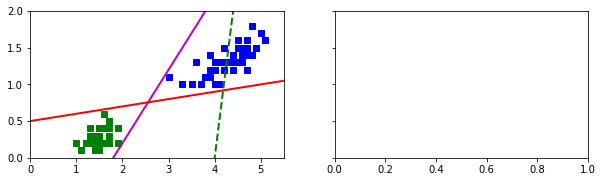

In [132]:
##Now lets see the bad guys
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5








##so lets plot them and see

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1],'bs')
plt.plot(X[:, 0][y==0], X[:, 1][y==0],'gs')
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.axis([0, 5.5, 0, 2])




In [136]:
##Lets try other examples before we continue

##so we are creating some data
from sklearn.datasets._samples_generator import make_blobs

X,y=make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [138]:
X.shape

(50, 2)

In [139]:
y.shape

(50,)

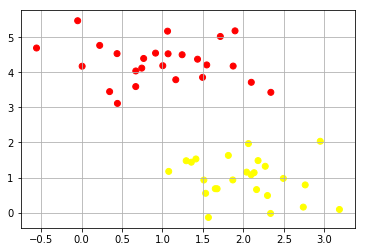

In [146]:
##So lets plot the scatter plot of the data
##lets say our petal length and width 
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
plt.grid()
plt.show()

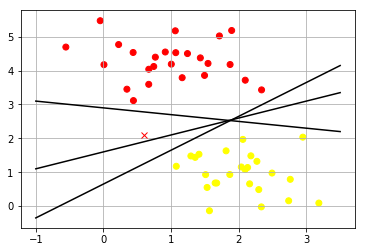

In [157]:
##so we can decide ooo lets draw a line between it 
### so we can do that by ploting 
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')
plt.plot([0.6],[2.1],marker='x',color='red')

for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit,m*xfit + b,'k')

plt.grid()
plt.show()

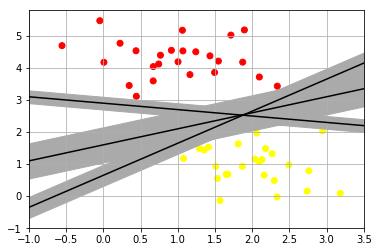

In [170]:
###from the above, depending on which youll choose, a new data point will be assigned to a different label'
##so to solve this problem, we say lets use SVM
##SO it says instead of us just drawing these lines okk let me add some width to the line
##so the one that maximizes the margin is chosen as the optimal model.BOOOM we got you

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:,0],X[:,1],c=y,cmap='autumn')

for m,b,d in [(1, 0.65,0.33), (0.5, 1.6,0.55), (-0.2, 2.9,0.2)]:
    yfit=m *xfit+b
    plt.plot(xfit,yfit,'k')
    plt.fill_between(xfit,yfit-d,yfit + d,edgecolor='none',color='#AAAAAA')
    

plt.xlim(-1, 3.5)
plt.grid()
plt.show()



In [174]:
###so we have seen how this will work normally.
##Now let us use scikit learn 
##because our data is small we are using SVC

from sklearn.svm import SVC

svm_clf=SVC(kernel='linear',C=1E10)
svm_clf.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

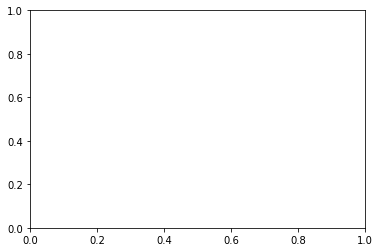

In [179]:
ax=plt.gca()

xlim=ax.get_xlim()
ylim=ax.get_ylim

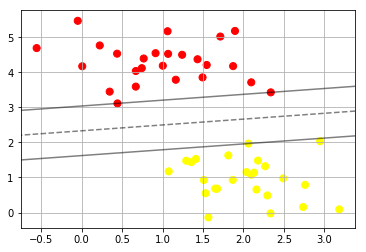

In [209]:
###Now lets visualize what's happening so we can understand better

ax=plt.gca()
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')

ylim= ax.get_ylim()

xlim=ax.get_xlim()

ylim

xl=np.linspace(xlim[0],xlim[1],30)
yl=np.linspace(ylim[0],ylim[1],30)

x_new,y_new=np.meshgrid(xl,yl)

XY=np.c_[x_new.ravel(),y_new.ravel()]

P=svm_clf.decision_function(XY).reshape(x_new.shape)

plt.contour(x_new,y_new,P,levels=[-1, 0, 1],alpha=0.5,linestyles=['-','--','-'],colors='k')

plt.grid()
plt.show()

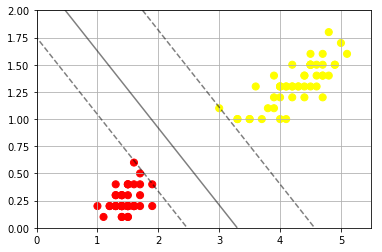

In [397]:
ax=plt.gca()
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')



#xlim=ax.get_xlim()

#xlim

xl=np.linspace(-5,5.5,200)

xl
yl=np.linspace(0,9,200)

x_new,y_new=np.meshgrid(xl,yl)

XY=np.c_[x_new.ravel(),y_new.ravel()]

P=svm_clf.decision_function(XY).reshape(x_new.shape)

plt.contour(P,y_new,x_new,levels=[-3.5,0,5.4],alpha=0.5,linestyles=['--','-','--'],colors='k')

plt.axis([0, 5.5, 0, 2])

plt.axis()
plt.grid()
plt.show()

In [354]:
1E-145

1e-145

In [225]:
##so let us develop a function we will use to plot our lines

def plot_decision_boundary_SVM(model,ax=None):
    ##so first we go develop the axes 
    ##the lim ones 
    if ax is None:
        ax=plt.gca()
        ylim= ax.get_ylim()
        xlim=ax.get_xlim()
    
    ##now make we ravel our data 
    xl=np.linspace(0,5.5,200)
    yl=np.linspace(0,1.9,200)
    
    
    
    
    x_new,y_new=np.meshgrid(xl,yl)
    XY=np.c_[x_new.ravel(),y_new.ravel()]
    P=svm_clf.decision_function(XY).reshape(x_new.shape)
    
    ##Now we plot
    plt.contour(x_new,y_new,P,levels=[-1, 1, 4],alpha=0.5,linestyles=['-','--','-'],colors='k')
    plt.grid()
    plt.show()
        

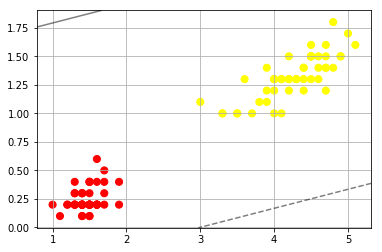

In [226]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='autumn')
plot_decision_boundary_SVM(svm_clf)


In [200]:
X.shape

(50, 2)

In [195]:
XY.shape

(900, 2)

In [198]:
x2=np.linspace(xlim[0],xlim[1],30)
y2=np.linspace(ylim[0],ylim[1],30)

Y2, X2 = np.meshgrid(y2, x2)
x2y2 = np.vstack([X2.ravel(), Y2.ravel()]).T

In [199]:
x2y2.shape

(900, 2)

In [187]:
svm_clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

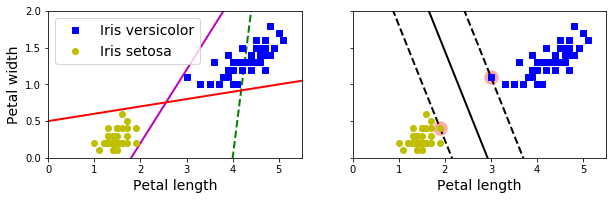

In [48]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [ ]:
###So from here we see that the we have two figures
##for the one on the right we applied SVM and we see the decision boundaries do not intersect,
##also they are attached to the closest training insatnce as possible

In [ ]:
###Always remeber to scala your datasets before passing to the SMV
##avoid using SVC as they are pretty slow with large data sets 
##use linearSvc or SGDclassifiers as they do better with larger data sets


In [ ]:
float('inf')

In [ ]:
iris.keys() #this tells us what this sets entails

In [ ]:
print (iris['DESCR'])

In [ ]:
DataFrame(iris['data'],columns=iris['feature_names']).head().iloc[:,2:4]

In [10]:
DataFrame(iris['target_names'])

,0
0,setosa
1,versicolor
2,virginica


In [ ]:
DataFrame(iris['target']).head()